## Air BNB NYC Data - Linear Regression
***
- Predict price of properties on the basis of independent features.

**Importing essential libraries**

In [123]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

**Loading the dataset**

In [124]:
bnb = pd.read_csv("Airbnb_NYC.csv")
bnb.head()

,Boroughs,Latitude,Longitude,Prop_Type,Min_Nights,Host_Listing_Cnt,Days_Available,Review_Cnt,Reviews30d,Price
0,Bronx,40.80011,-73.91330,PrivateRoom,21.0,2.0,291,19,0.27,60.0
1,Bronx,40.80024,-73.91422,PrivateRoom,3.0,1.0,0,59,2.93,49.0
2,Bronx,40.80074,-73.91574,PrivateRoom,3.0,1.0,354,3,0.87,50.0
3,Bronx,40.80091,-73.91449,PrivateRoom,21.0,2.0,117,18,0.36,71.0
4,Bronx,40.80143,-73.91353,EntireHome,2.0,3.0,0,12,3.50,115.0


In [125]:
bnb.tail()

,Boroughs,Latitude,Longitude,Prop_Type,Min_Nights,Host_Listing_Cnt,Days_Available,Review_Cnt,Reviews30d,Price
38728,Staten Island,40.64641,-74.08502,EntireHome,2.0,1.0,106,58,4.73,130.0
38729,Staten Island,40.64682,-74.08734,PrivateRoom,20.0,1.0,89,58,1.05,43.0
38730,Staten Island,40.64730,-74.08408,PrivateRoom,30.0,4.0,0,85,1.35,105.0
38731,Staten Island,40.64762,-74.08682,EntireHome,3.0,1.0,232,5,1.88,135.0
38732,Staten Island,40.64779,-74.08460,EntireHome,1.0,1.0,250,108,2.32,140.0


**About the dataset:**
Neighbourhood_Group - The location of the property

Latitude and Longitude - Geographical location of the property

Prop_Type - The type of property as Private Room, Entire House

Min_Nights - Minimum nights of stay

Host_Listing_Cnt - How long they have listed it

Days_Available - Availability of property in days

Review_Cnt - Count of reviews in the property

Reviews30d - Activeness of reviews/ how many reviews have been posted in 30 days

Price - What is the market price they are askin for

In [126]:
bnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38733 entries, 0 to 38732
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Boroughs          38733 non-null  object 
 1   Latitude          38733 non-null  float64
 2   Longitude         38733 non-null  float64
 3   Prop_Type         38733 non-null  object 
 4   Min_Nights        38695 non-null  float64
 5   Host_Listing_Cnt  38378 non-null  float64
 6   Days_Available    38733 non-null  int64  
 7   Review_Cnt        38733 non-null  int64  
 8   Reviews30d        38733 non-null  float64
 9   Price             38724 non-null  float64
dtypes: float64(6), int64(2), object(2)
memory usage: 3.0+ MB


In [127]:
bnb.describe()

,Latitude,Longitude,Min_Nights,Host_Listing_Cnt,Days_Available,Review_Cnt,Reviews30d,Price
count,38733.000000,38733.000000,38695.000000,38378.000000,38733.000000,38733.000000,38733.000000,38724.000000
mean,40.727848,-73.950735,5.523659,2.987545,114.234890,29.510650,1.365694,140.879248
std,0.055274,0.047167,10.817380,8.413190,130.182077,48.654548,1.692891,194.490892
min,40.506410,-74.244420,1.000000,1.000000,0.000000,1.000000,0.010000,10.000000
25%,40.688450,-73.982290,1.000000,1.000000,0.000000,3.000000,0.190000,68.000000
50%,40.721490,-73.954600,2.000000,1.000000,50.000000,10.000000,0.710000,100.000000
75%,40.762810,-73.934460,4.000000,2.000000,234.000000,33.000000,2.000000,169.000000
max,40.912400,-73.712990,300.000000,96.000000,365.000000,639.000000,66.610000,10000.000000


## Data Preprocessing - Part 1
***

In [128]:
bnb.isnull().sum()

Boroughs              0
Latitude              0
Longitude             0
Prop_Type             0
Min_Nights           38
Host_Listing_Cnt    355
Days_Available        0
Review_Cnt            0
Reviews30d            0
Price                 9
dtype: int64

In [129]:
nyc = bnb.dropna(thresh=9)

nyc.Min_Nights.fillna(bnb.Min_Nights.median(),inplace=True)
nyc.Host_Listing_Cnt.fillna(bnb.Host_Listing_Cnt.median(),inplace=True)
nyc.Price.fillna(bnb.Price.median(),inplace=True)

In [130]:
nyc.isnull().sum()

Boroughs            0
Latitude            0
Longitude           0
Prop_Type           0
Min_Nights          0
Host_Listing_Cnt    0
Days_Available      0
Review_Cnt          0
Reviews30d          0
Price               0
dtype: int64

## Exploratory Data Analysis
***

### Univariate Analysis

**Count of diffrent types of Propety Type**

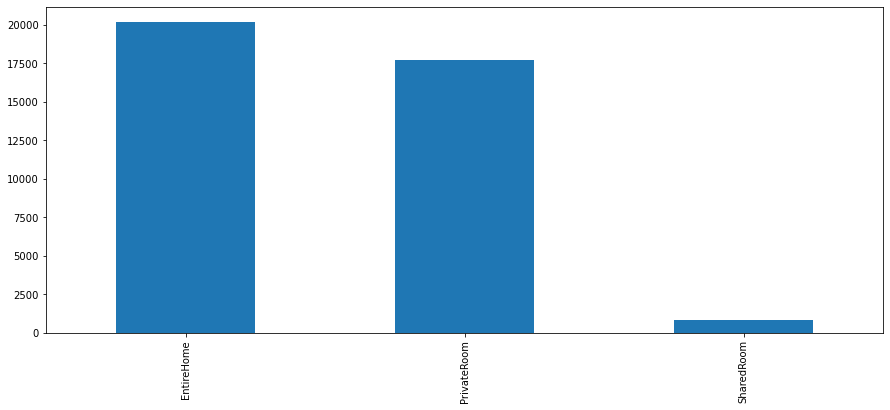

In [131]:
plt.figure(figsize=(15,6))
nyc.Prop_Type.value_counts().plot(kind='bar')
plt.show()

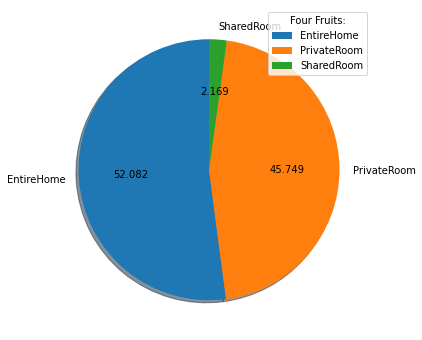

In [132]:
labels = ['EntireHome','PrivateRoom','SharedRoom']
plt.figure(figsize=(8,6))
plt.pie(nyc.Prop_Type.value_counts(),labels=labels,startangle = 90,autopct='%.3f',shadow=True)
plt.legend(title = "Four Fruits:")
plt.show()

**Observations:**
- There three types of properties Air BNB has, the maximum percentage of properties are EntireHome and few less than that are PrivateRoom.
- The least is shared room.

**Count of different Boroughs**

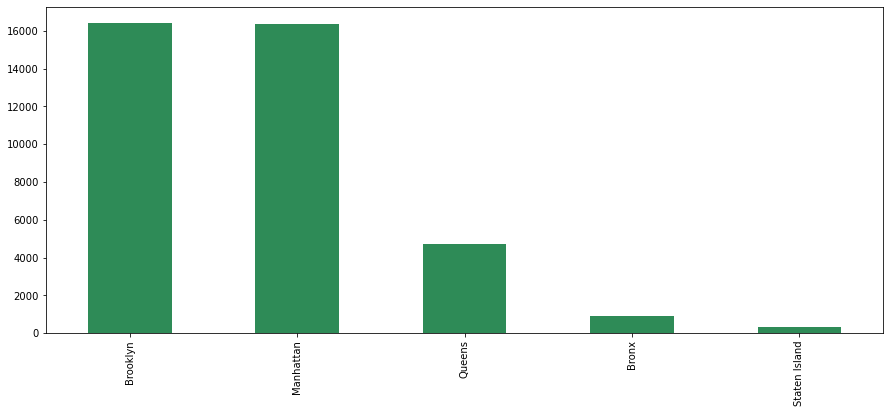

In [133]:
plt.figure(figsize=(15,6))
nyc.Boroughs.value_counts().plot(kind='bar',color='seagreen')
plt.show()

**Observations:**
- As bar chart is showing clear that, Brooklyn and Manhatten has most of the Boroughs and less followed by Queens, Bronx and Saten Island.

**Reviews**

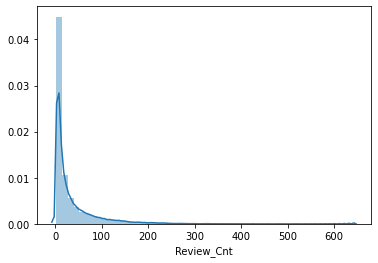

In [134]:
sns.distplot(nyc.Review_Cnt)
plt.show()

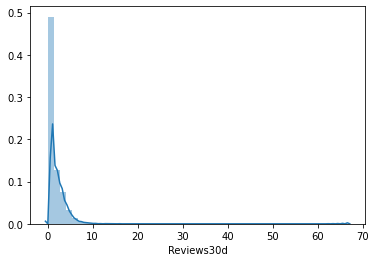

In [135]:
sns.distplot(nyc.Reviews30d)
plt.show()

**Observations:**
- Most of the Air BNB's has got 0-200 reviews  and very few has got more than 200.
- In both the features Reviews Count and Reviews per 30 days has same obervations as above.

**Price of Air BNBs**

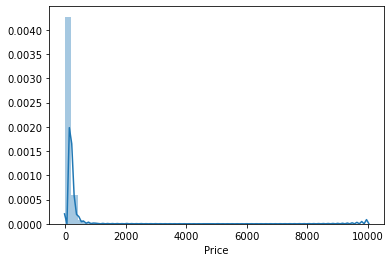

In [136]:
sns.distplot(nyc.Price)
plt.show()

**Observations:**
- Most of the Air BNBs are having price range around 0-1500($US Dollars). And very less are from price 1500-9000($US Dollars).
- Some Air BNBs are having price 9000-10000 and the count of them is also slightly greater than middle range.

### Bivariate Analysis

**Boroughs**
1. Average Price vs Boroughs

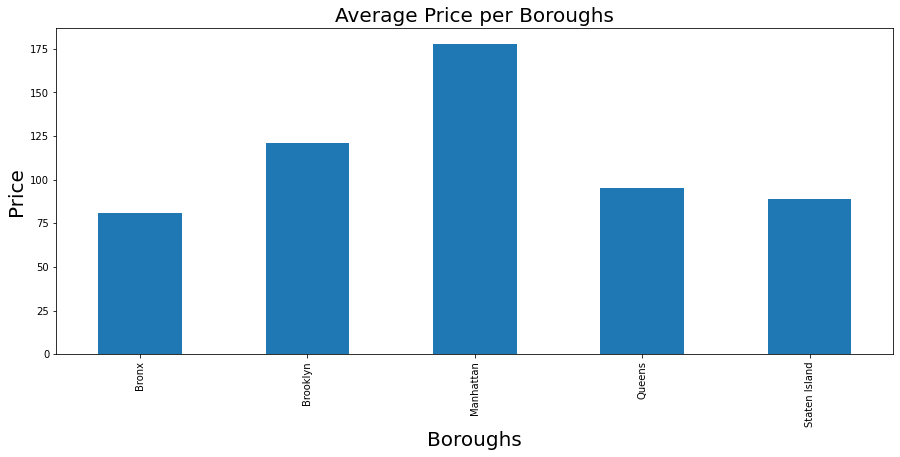

In [137]:
plt.figure(figsize=(15,6))
nyc.groupby('Boroughs').mean()['Price'].plot(kind='bar')
plt.title("Average Price per Boroughs", size=20)
plt.xlabel("Boroughs", size=20)
plt.ylabel('Price', size=20)
plt.show()

**Observations:**
- Average price of Air BNB at per Boroughs is shown in above bar chart.
- Inspite of not having maximum number of Air BNBs in Manhattan, it has maximum average price.
- And Staten Island is having very less number of Air BNBs and still the average price is competative with Bronx and Queens.

2. Boroughs vs Property Type

In [138]:
pd.crosstab(nyc.Boroughs,nyc.Prop_Type)

Prop_Type,EntireHome,PrivateRoom,SharedRoom
Boroughs,,,
Bronx,308,532,51
Brooklyn,8163,7992,281
Manhattan,9776,6258,349
Queens,1770,2772,153
Staten Island,156,166,6


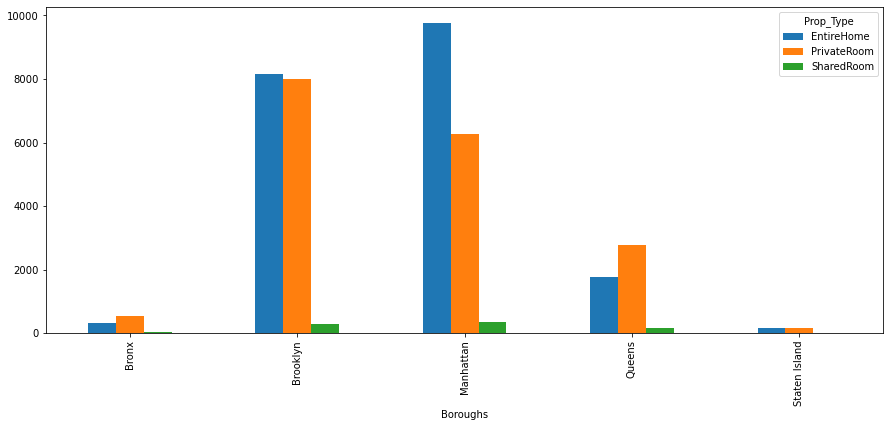

In [139]:
pd.crosstab(nyc.Boroughs,nyc.Prop_Type).plot(kind='bar',figsize=(15,6))
plt.show()

**Observations:**
- Property type per borough is shown in this grouped bar chart.
- Brooklyn and Manhattan borough has maximum number of Entire Homes and very few Shared Rooms. Private rooms are around average in Manhattan, but more in Brooklyn.
- 


3. Minimum Nights vs Boroughs

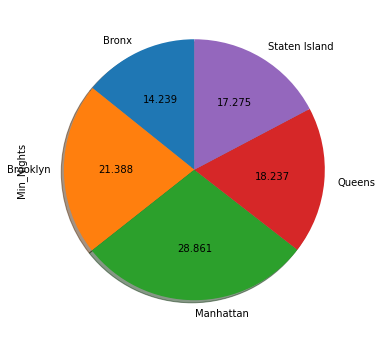

In [140]:
nyc.groupby(nyc.Boroughs).mean()['Min_Nights'].plot(kind='pie',figsize=(8,6),startangle = 90,autopct='%.3f',shadow=True)
plt.show()

**Observations:**
- Minimum nights at different boroughs is shown is this pie and visualization shows that, Manhattan being the top borough to have the highest average minimum night stay and lowest is staten island, as the island is small and these average days are more than enough to explore the Staten Islands

4. Reviews Count vs Boroughs

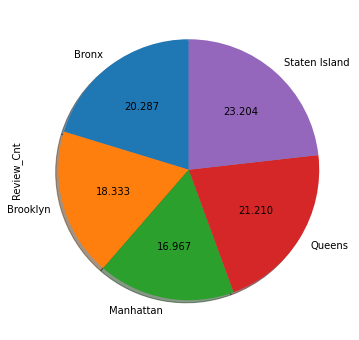

In [141]:
nyc.groupby(nyc.Boroughs).mean()['Review_Cnt'].plot(kind='pie',figsize=(8,6),startangle = 90,autopct='%.3f',shadow=True)
plt.show()

**Observations:**
- All the boroughs have nearly same review count just Manhattan has less average review count than all the other boroughs.
- Staten Islands has maximum average reviews count and we know that, staten island has lowest count of Air BNBs.

**Property Type**

1. Average Price vs Property Type

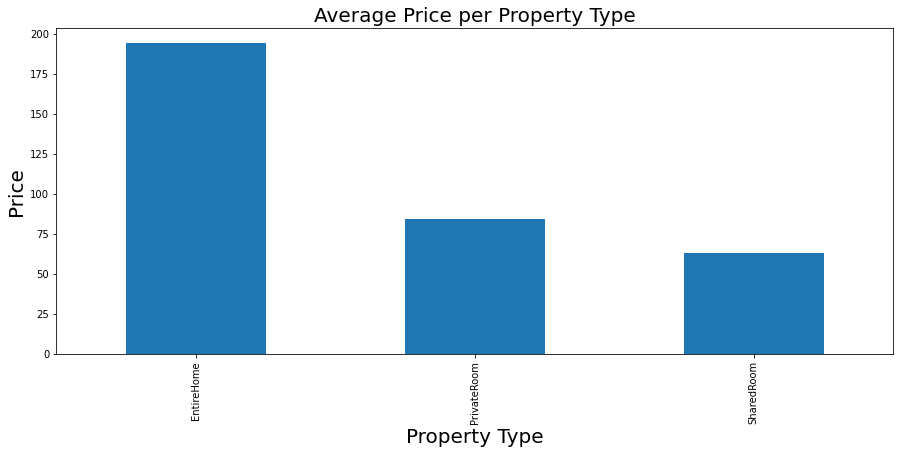

In [142]:
plt.figure(figsize=(15,6))
nyc.groupby('Prop_Type').mean()['Price'].plot(kind='bar')
plt.title("Average Price per Property Type", size=20)
plt.xlabel("Property Type", size=20)
plt.ylabel('Price', size=20)
plt.show()

**Observations:**
- There are three property types and the most of the boroughs have Entire Home type in large number. Private Rooms and Shared Rooms are too less than Entire Home but, they both have competitive count between themselves.

2. Average Percantage vs List Count per Property

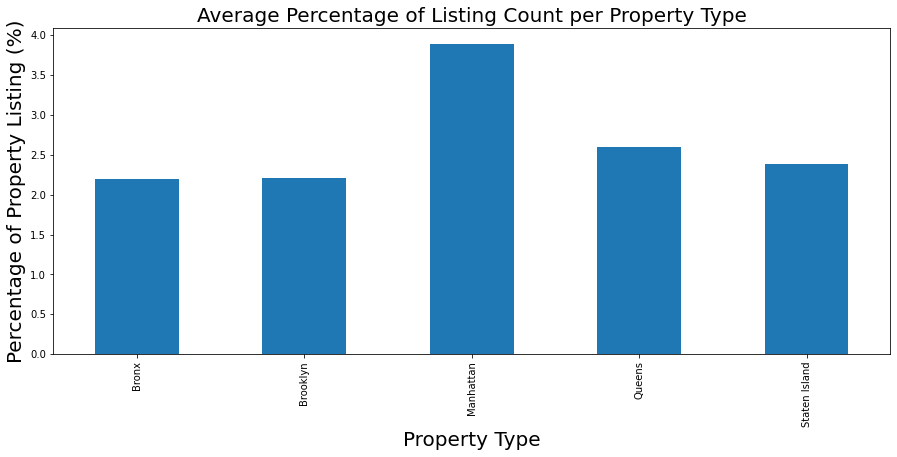

In [145]:
plt.figure(figsize=(15,6))
nyc.groupby('Boroughs').mean()['Host_Listing_Cnt'].plot(kind='bar')
plt.title("Average Percentage of Listing Count per Property Type", size=20)
plt.xlabel("Property Type", size=20)
plt.ylabel('Percentage of Property Listing (%)', size=20)
plt.show()

**Observations:**
- Property listing is the main aspect, as it shows the the performance and role of different boroughs in business of Air BNB.
- Manhattan has won the race in listing maximum properties and followed by Queens. Rest of the boroughs are having competitive score in themseleves.
- We can conlcude that, all the cities are platijg important role in increasing business in which Manhattan is the most important borough for Air BNB.

3. Property Type vs Minimum Nights

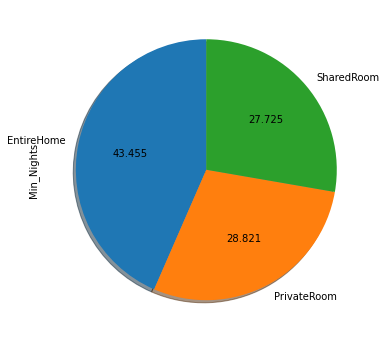

In [146]:
nyc.groupby(nyc.Prop_Type).mean()['Min_Nights'].plot(kind='pie',figsize=(8,6),startangle = 90,autopct='%.3f',shadow=True)
plt.show()

**Observations:**
- Without any doubt, we can say that Entire Home is anyway going to show the maximum percentage as people will live there for longer time than other property types.
- There is a noticable point that, Private and Shared both property types are also near to each other in average minimum night stay of people in those properties.

4. Property Type vs Price

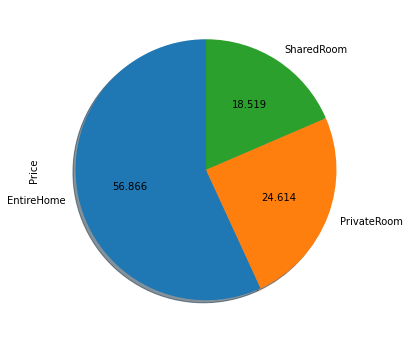

In [148]:
nyc.groupby(nyc.Prop_Type).mean()['Price'].plot(kind='pie',figsize=(8,6),startangle = 90,autopct='%.3f',shadow=True)
plt.show()

**Observations:**
- Practically thinking, Entire Home must have and extra, premium services and it will cost higher than other property types.
- Private Rooms are also having much more average price than Shared room because, anyways in the Shared rooms the cost is being splited into total number of tenants.

## Data Preprocessing - Part 2

**Our system cannot understand the object data type, so we will replace the categories by their representation number.**

- There are three types to do that:
    1. Replacing value by creating a dictionary and new columns
    2. Label Encoding (Suitable for only 2 categories) (not possible with this dataset)
    3. One-Hot Encoding (Suitable for two or more categories)

In [149]:
# 1. Replacing value by creating a dictionary and new columns
nyc['isEntireHome'] = bnb.Prop_Type.map({'EntireHome':1,'PrivateRoom':0,'SharedRoom':0})
nyc['isPrivateRoom'] = bnb.Prop_Type.map({'EntireHome':0,'PrivateRoom':1,'SharedRoom':0})
nyc.iloc[3:5]

,Boroughs,Latitude,Longitude,Prop_Type,Min_Nights,Host_Listing_Cnt,Days_Available,Review_Cnt,Reviews30d,Price,isEntireHome,isPrivateRoom
3,Bronx,40.80091,-73.91449,PrivateRoom,21.0,2.0,117,18,0.36,71.0,0,1
4,Bronx,40.80143,-73.91353,EntireHome,2.0,3.0,0,12,3.50,115.0,1,0


- The more fast and easy derived method in Pandas is **One-Hot Encoding**

In [150]:
# 2. One-Hot Encoding (Suitable for two or more categories)
dummy_NG = pd.get_dummies(nyc.Boroughs,drop_first=True)
dummy_NG

,Brooklyn,Manhattan,Queens,Staten Island
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
38728,0,0,0,1
38729,0,0,0,1
38730,0,0,0,1
38731,0,0,0,1


- To join this above dataframe to main dataframe, we will use concatenation

In [151]:
nyc = pd.concat([nyc,dummy_NG],axis='columns') # or axis=1
nyc.head()

,Boroughs,Latitude,Longitude,Prop_Type,Min_Nights,Host_Listing_Cnt,Days_Available,Review_Cnt,Reviews30d,Price,isEntireHome,isPrivateRoom,Brooklyn,Manhattan,Queens,Staten Island
0,Bronx,40.80011,-73.91330,PrivateRoom,21.0,2.0,291,19,0.27,60.0,0,1,0,0,0,0
1,Bronx,40.80024,-73.91422,PrivateRoom,3.0,1.0,0,59,2.93,49.0,0,1,0,0,0,0
2,Bronx,40.80074,-73.91574,PrivateRoom,3.0,1.0,354,3,0.87,50.0,0,1,0,0,0,0
3,Bronx,40.80091,-73.91449,PrivateRoom,21.0,2.0,117,18,0.36,71.0,0,1,0,0,0,0
4,Bronx,40.80143,-73.91353,EntireHome,2.0,3.0,0,12,3.50,115.0,1,0,0,0,0,0


- We need to drop  the initial columns Neighbourhood_Group and Prop_Type

In [152]:
nyc.drop(['Boroughs','Prop_Type'],axis=1,inplace=True)
nyc

,Latitude,Longitude,Min_Nights,Host_Listing_Cnt,Days_Available,Review_Cnt,Reviews30d,Price,isEntireHome,isPrivateRoom,Brooklyn,Manhattan,Queens,Staten Island
0,40.80011,-73.91330,21.0,2.0,291,19,0.27,60.0,0,1,0,0,0,0
1,40.80024,-73.91422,3.0,1.0,0,59,2.93,49.0,0,1,0,0,0,0
2,40.80074,-73.91574,3.0,1.0,354,3,0.87,50.0,0,1,0,0,0,0
3,40.80091,-73.91449,21.0,2.0,117,18,0.36,71.0,0,1,0,0,0,0
4,40.80143,-73.91353,2.0,3.0,0,12,3.50,115.0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38728,40.64641,-74.08502,2.0,1.0,106,58,4.73,130.0,1,0,0,0,0,1
38729,40.64682,-74.08734,20.0,1.0,89,58,1.05,43.0,0,1,0,0,0,1
38730,40.64730,-74.08408,30.0,4.0,0,85,1.35,105.0,0,1,0,0,0,1
38731,40.64762,-74.08682,3.0,1.0,232,5,1.88,135.0,1,0,0,0,0,1


## Machine Learning Modeling

In [214]:
nyc = nyc.sample(frac=1, random_state=44)
y = nyc['Price']
X = nyc.drop('Price', axis=1)

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=44)

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [216]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [217]:
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print('r-squared-train: ', r2_train)
print('r-squared-test : ', r2_test)


rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("="*50)
print('rmse-train: ', rmse_train)
print('rmse-test : ', rmse_test)

r-squared-train:  0.1125003476692672
r-squared-test :  0.12280303300574069
rmse-train:  185.9800322101494
rmse-test :  175.51718480025667


In [218]:
lr.intercept_

-27147.7608692159

In [219]:
pd.DataFrame(lr.coef_, index = X.columns, columns=['coefs'])

,coefs
Latitude,-117.884985
Longitude,-432.581153
Min_Nights,-0.566910
Host_Listing_Cnt,-0.726347
Days_Available,0.176482
Review_Cnt,-0.194306
Reviews30d,-0.251333
isEntireHome,132.966516
isPrivateRoom,32.354619
Brooklyn,-13.289329


We can not say that there is overfitting, as the model is not that complex.

**Prediction using model:**

In [220]:
lr.predict([[40.80024,-73.91422,23.0,1.0,0,29,2.93,1,0,0,0,1,0]])

array([136.29213573])

## Happy Learning! 